# Titanic Survival Prediction

In [33]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
%matplotlib inline

In [34]:
titanic=sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Survival Count

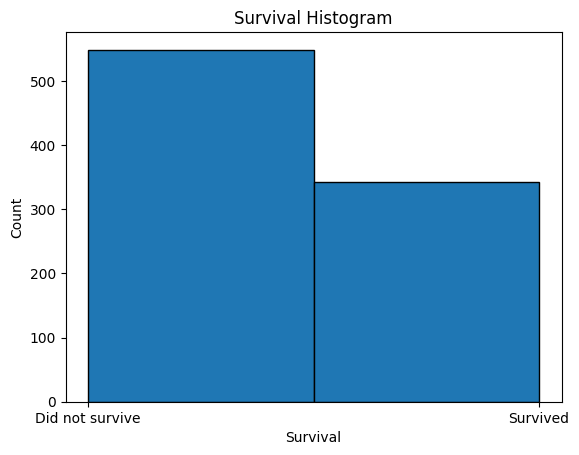

In [35]:
plt.hist(titanic['survived'], bins=[0, 0.5, 1], edgecolor='black', align='mid')

plt.xlabel("Survival")
plt.ylabel("Count")
plt.title("Survival Histogram")
plt.xticks([0, 1], ['Did not survive', 'Survived'])

plt.show()

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


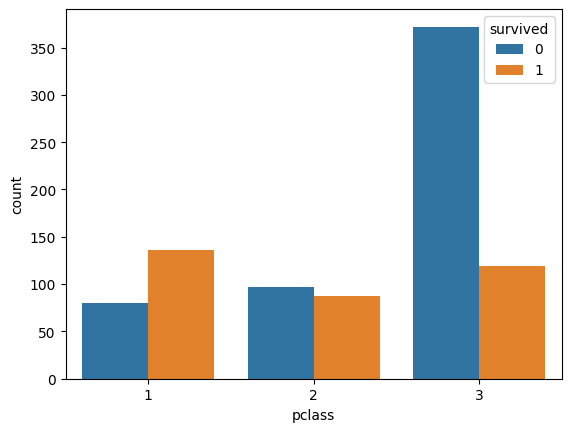

In [36]:
print(titanic.columns)

sns.countplot(x=titanic["pclass"], hue=titanic["survived"])
plt.show()

# SEX Feature

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


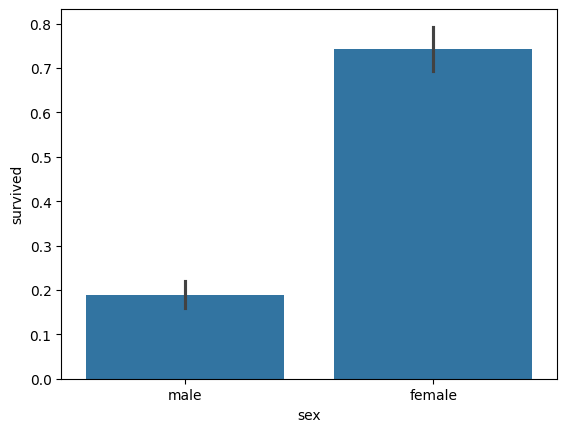

In [37]:
sns.barplot(x="sex", y="survived", data=titanic)

# Print percentages of females vs. males that survive
female_survival_percentage = titanic["survived"][titanic["sex"] == 'female'].value_counts(normalize=True)[1] * 100
male_survival_percentage = titanic["survived"][titanic["sex"] == 'male'].value_counts(normalize=True)[1] * 100

print("Percentage of females who survived:", female_survival_percentage)
print("Percentage of males who survived:", male_survival_percentage)

As predicted, females have a much higher chance of survival than males. The Sex feature is essential in our predictions.

# Pclass Feature

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


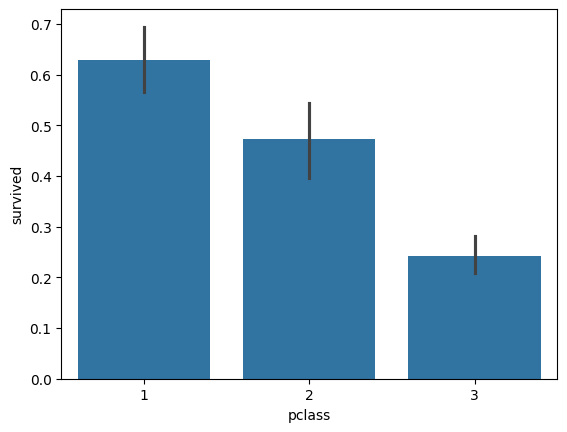

In [38]:
sns.barplot(x="pclass", y="survived", data=titanic)

# Print percentage of people by Pclass that survived
pclass1_survival_percentage = titanic["survived"][titanic["pclass"] == 1].value_counts(normalize=True)[1] * 100
pclass2_survival_percentage = titanic["survived"][titanic["pclass"] == 2].value_counts(normalize=True)[1] * 100
pclass3_survival_percentage = titanic["survived"][titanic["pclass"] == 3].value_counts(normalize=True)[1] * 100

print("Percentage of Pclass = 1 who survived:", pclass1_survival_percentage)
print("Percentage of Pclass = 2 who survived:", pclass2_survival_percentage)
print("Percentage of Pclass = 3 who survived:", pclass3_survival_percentage)

As predicted, people with higher socioeconomic class had a higher rate of survival. (62.9% vs. 47.3% vs. 24.2%)

# SibSp Feature

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


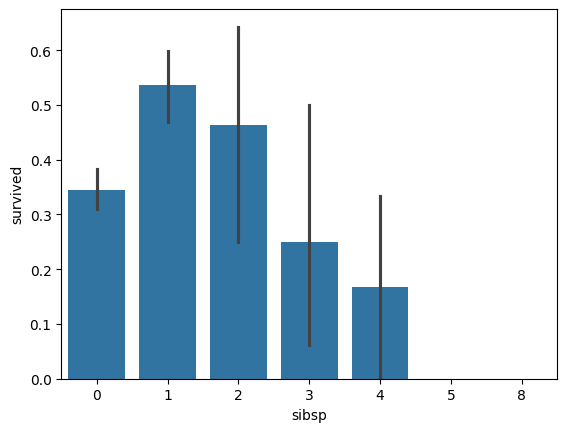

In [39]:
sns.barplot(x="sibsp", y="survived", data=titanic)


sibsp0_survival_percentage = titanic["survived"][titanic["sibsp"] == 0].value_counts(normalize=True)[1] * 100
sibsp1_survival_percentage = titanic["survived"][titanic["sibsp"] == 1].value_counts(normalize=True)[1] * 100
sibsp2_survival_percentage = titanic["survived"][titanic["sibsp"] == 2].value_counts(normalize=True)[1] * 100

print("Percentage of SibSp = 0 who survived:", sibsp0_survival_percentage)
print("Percentage of SibSp = 1 who survived:", sibsp1_survival_percentage)
print("Percentage of SibSp = 2 who survived:", sibsp2_survival_percentage)

In general, it's clear that people with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses were less to likely to survive than those with one or two. (34.5% vs 53.4% vs. 46.4%)

# Parch Feature

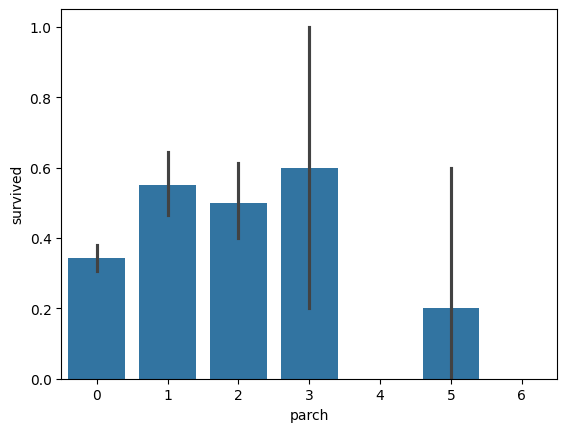

In [40]:
#draw a bar plot for Parch vs. survival
sns.barplot(x="parch", y="survived", data=titanic)
plt.show()

People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children

# Age Feature

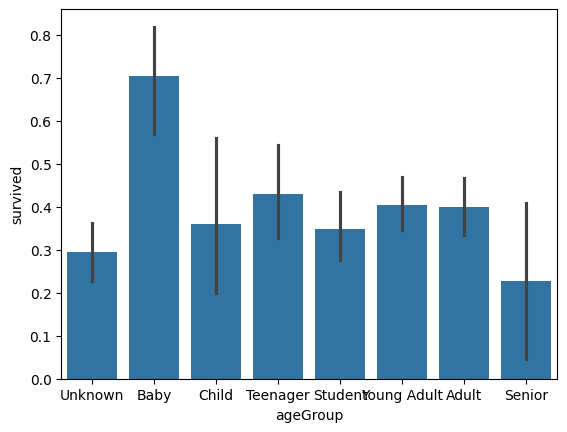

In [41]:
titanic["age"] = titanic["age"].fillna(-0.5)

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

titanic['ageGroup'] = pd.cut(titanic["age"], bins, labels=labels)

sns.barplot(x="ageGroup", y="survived", data=titanic)
plt.show()

Babies are more likely to survive than any other age group.